# Oxnard and Sites of Toxic Releases

As Antonia and I continue to explore toxic facilities within Oxnard and Malibu we have shifted our methods and goals. Initially inspired by UCLA's Toxic Tides project and focus on enviromental justice, we are now taking a closer look at the EPA's TRI (toxic release inventory) that gives us data on sites of toxic releases within Calfornia. For the purpose of our research we are taking a closer look at Oxnard (a predominantely Latinx community) and the greater Los Angeles area.  

Not only does the TRI site give us meaningful data, it also gives us insight and reseach into the impacts of toxic releases. A "release" is a an exposure of a chemical means that it is emitted to the air or water, or placed in some type of land disposal. TRI tracks the management of certain toxic chemicals that may pose a threat to human health and the environment. U.S. facilities in different industry sectors must report annually how much of each chemical is released to the environment. In general, chemicals covered by the TRI Program are those that may cause Cancer or other chronic human health effects, significant adverse acute human health effects and significant adverse environmental effects.

Antonia and I are beginning to see what these trends look like on a smaller spatial scale, looking at individual cities and attempting to use an enviromental justice framework that observes the communities being diproportionately affected. 



## Toxic Releases in Oxnard, categorized by Industry Sector

In [6]:

# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt
#using a shortened data set that inccludes just Oxnard locations we upload our data of Oxnard toxic releases.


In [7]:
ox_toxic = gpd.read_file("oxnard_toxic.csv")

In [8]:
ox_toxic['Latitude'] = ox_toxic['Latitude'].astype(float)
ox_toxic['Longitude'] = ox_toxic['Longitude'].astype(float)
#we transform our latititudes and longitudes into floats 

In [9]:
ox_toxic.info

<bound method DataFrame.info of     Longitude   Latitude                                      Name  \
0 -119.183020  34.140350                       New-Indy Oxnard LLC   
1 -119.168445  34.141707           Aluminum Precision Products INC   
2 -119.168110  34.196130                        Cemex Oxnard Plant   
3 -119.147180  34.198100                      Parker Hannifin Corp   
4 -119.130352  34.205928                      PTI Technologies Inc   
5 -119.140427  34.209468     The Procter & Gamble Paper Product CO   
6 -119.163291  34.249140  Southern Counties Oil CO LP DBA SC Fuels   
7 -119.129346  34.199354       Associated Ready Mixed Concrete Inc   
8 -119.143053  34.270536                  Vulcan Materials-Saticoy   

                                        Address              Industry Sector  \
0           5936 Perkins Road, Oxnard, CA 93033                        Paper   
1      1001 MC Wane Bouvelard, Oxnard, CA 93033            Fabricated Metals   
2             548 Diaz Aven

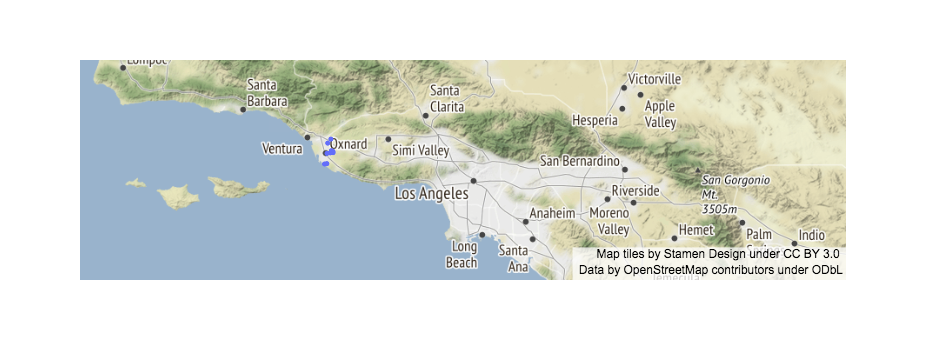

In [52]:
fig = px.scatter_mapbox(ox_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-terrain")
fig.show()

## Map of Toxic Releases in Oxnard 

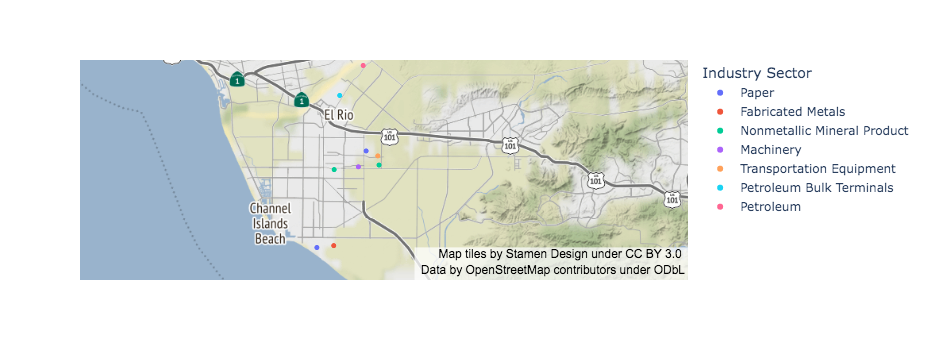

In [37]:
fig = px.scatter_mapbox(ox_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        color="Industry Sector",
                        labels={'Industry Sector':'Industry Sector'},
                        mapbox_style="stamen-terrain"
                       )
fig.show()
#we now add color and labels to our interative map 

We begin to produce a bar graph by calling the industry sector column and the counts of each type 

In [55]:
facility_by_sector_type_ox = ox_toxic['Industry Sector'].value_counts().reset_index()
facility_by_sector_type_ox

,index,Industry Sector
0,Paper,2
1,Nonmetallic Mineral Product,2
2,Fabricated Metals,1
3,Machinery,1
4,Transportation Equipment,1
5,Petroleum Bulk Terminals,1
6,Petroleum,1


In [56]:
facility_by_sector_type_ox.columns=['industry_sector','count']
facility_by_sector_type_ox

,industry_sector,count
0,Paper,2
1,Nonmetallic Mineral Product,2
2,Fabricated Metals,1
3,Machinery,1
4,Transportation Equipment,1
5,Petroleum Bulk Terminals,1
6,Petroleum,1


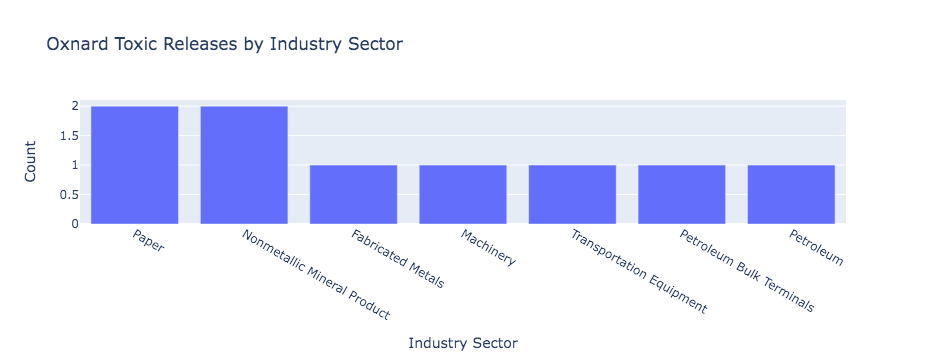

In [58]:
fig = px.bar(facility_by_sector_type_ox.head(20),
       x='industry_sector',
       y='count',
       title='Oxnard Toxic Releases by Industry Sector',
        labels={
            'industry_sector':'Industry Sector',
            'count':'Count'
        })

fig.show()

The map help us visualize the location and spread/clustering of toxic releases and the bar graph lets us take a closer look at the most prominent types of toxic industry in this city.

## Toxic Releases in Los Angeles, categorized by Industry Sector 

In [26]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [27]:
la_toxic = gpd.read_file("toxic_la_data.csv",GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

Here something was off with my csv file and I had to look up what code could fix a "recursion," error 

In [28]:
la_toxic.shape

(110, 10)

In [33]:
la_toxic['Latitude'] = la_toxic['Latitude'].astype(float)
la_toxic['Longitude'] = la_toxic['Longitude'].astype(float)

## Map of Toxic Releases in Los Angeles 

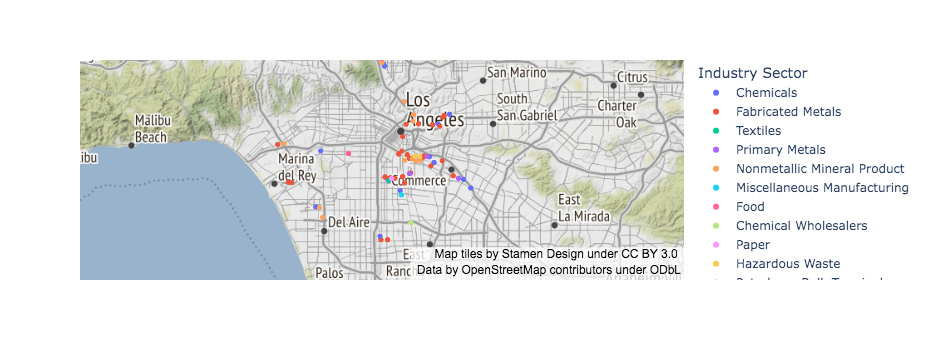

In [35]:
fig = px.scatter_mapbox(la_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        color="industry_sector",
                        labels={'industry_sector':'Industry Sector'},
                        mapbox_style="stamen-terrain"
                       )
fig.show()
#using a shortened data set that inccludes just Los Angeles locations we upload our data of Oxnard toxic releases.
#I had to manually add Industry sector types onto the excel sheet because the downloaded file did not include it 

In [42]:

facility_by_sector_type = la_toxic.industry_sector.value_counts().reset_index()
facility_by_sector_type

,index,industry_sector
0,Fabricated Metals,47
1,Chemicals,25
2,Nonmetallic Mineral Product,16
3,Food,5
4,Primary Metals,4
5,Hazardous Waste,3
6,Textiles,2
7,Miscellaneous Manufacturing,2
8,Chemical Wholesalers,2
9,Paper,2


We begin to produce a bar graph by calling the industry sector column and the counts of each type 

In [43]:
# rename the columns
facility_by_sector_type.columns=['industry_sector','count']
facility_by_sector_type

,industry_sector,count
0,Fabricated Metals,47
1,Chemicals,25
2,Nonmetallic Mineral Product,16
3,Food,5
4,Primary Metals,4
5,Hazardous Waste,3
6,Textiles,2
7,Miscellaneous Manufacturing,2
8,Chemical Wholesalers,2
9,Paper,2


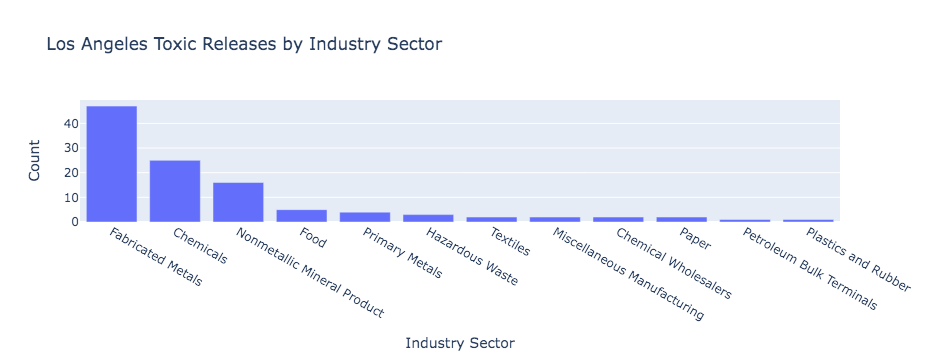

In [61]:
fig = px.bar(facility_by_sector_type.head(20),
       x='industry_sector',
       y='count',
       title='Los Angeles Toxic Releases by Industry Sector',
        labels={
            'industry_sector':'Industry Sector',
            'count':'Count'
        })

fig.show()

The map of toxic releases in Los Angeles helps us see where most of the industry clusters, we can see that there is a lot more toxic releases in East LA than West LA. The bar graph allows us to further examine the most prominent types of industry sectors and toxic releases. 